# Download required packages

In [1]:
!pip3 install -U tbb  &> /dev/null && echo "done"
!pip3 install -I humanize==3.9.0 numba==0.53.0 &> /dev/null && echo "done"
!pip3 install crr_labels epigenomic_dataset extra_keras_metrics \
    ucsc_genomes_downloader cache_decorator[all] minepy        \
    MulticoreTSNE &> /dev/null && echo "done"
!pip3 install keras_mixed_sequence keras_bed_sequence -U &> /dev/null && echo "done"

done
done
done
done


# Imports

In [2]:
from cache_decorator import Cache
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from multiprocessing import cpu_count
import matplotlib.pyplot as plt
from epigenomic_dataset import active_enhancers_vs_inactive_enhancers, active_promoters_vs_inactive_promoters
import seaborn as sbn
import typing as T

# Mount Google Drive folder

The following command is useful when working in Colab, because the execution of cached method can be saved in a Google Drive folder and the results can be retrived in future sessions.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Retrive epigenomic data

In [4]:
cell_line = "K562"
genome_assembly = "hg38"
window_size = 512

aeie_X, aeie_y = active_enhancers_vs_inactive_enhancers(
    cell_line=cell_line,
    assembly=genome_assembly,
    window_size=window_size,
    root="/content/drive/MyDrive/bio-data/",
    verbose=1,
    binarize=True,
    min_active_tpm_value=0,
    max_inactive_tpm_value=0,
)

apip_X, apip_y = active_promoters_vs_inactive_promoters(
    cell_line=cell_line,
    assembly=genome_assembly,
    window_size=window_size,
    root="/content/drive/MyDrive/bio-data/",
    verbose=1,
    binarize=True,
)

epigenomes = {
    "promoters": apip_X,
    "enhancers": aeie_X,
}

labels = {
    "promoters": apip_y,
    "enhancers": aeie_y,
}

# Retrive genomic sequence

In [5]:
from ucsc_genomes_downloader import Genome

genome = Genome(
    "hg38",
    cache_directory="/content/drive/MyDrive/bio-data/genomes"
)

Loading chromosomes for genome hg38:   0%|          | 0/25 [00:00<?, ?it/s]

# Describe dataset

## Explore sequence dataset

Print some basic information about the genome.

In [ ]:
genome

Human, Homo sapiens, hg38, 2013-12-23, 25 chromosomes

Show the sequence chromosomes

In [ ]:
print("The chromosomes in the human genome are: {}.".format(", ".join(genome)))

The chromosomes in the human genome are: chr1, chrM, chr21, chr22, chrY, chr19, chr20, chr18, chr17, chr16, chr15, chr14, chr13, chr12, chr10, chr11, chr9, chr8, chrX, chr7, chr6, chr5, chr4, chr3, chr2.


Create the bed sequence from the genome and print the one-hot encoded with BedSequence.

In [6]:
def to_bed(data: pd.DataFrame) -> pd.DataFrame:
    """Return bed coordinates from given dataset."""
    return data.reset_index()[data.index.names]

In [ ]:
from keras_bed_sequence import BedSequence

def show_bed_sequence(genome: Genome,
                      dataset: pd.DataFrame,
                      region: str):
    # BedSequence one-hot encodes the genome sequence
    print("="*20, region.upper(), "="*20)
    seq = np.array(BedSequence(genome,
                               bed=to_bed(dataset),
                               batch_size=1))
    print(seq.shape)
    display(seq)


for region, X in epigenomes.items():
    show_bed_sequence(genome, X, region)

==================== PROMOTERS ====================


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(99881, 1, 512, 4)


array([[[[0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]],


       [[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]]],


       [[[0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         [0., 0., 0., 1.]]],


       ...,


       [[[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.]]],


       [[[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.],
         ...,
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.]]],


       [[[0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
     

==================== ENHANCERS ====================
(63285, 1, 512, 4)


array([[[[0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.]]],


       [[[1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [1., 0., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]]],


       [[[0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 1., 0., 0.]]],


       [[[1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         ...,
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.]]],


       [[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
     

## Explore epigenomic dataset

In [ ]:
aeie_X

chrom                              SMAD5  NCOA2  ZNF23  ...  NCOR1  NCOA1  KLF1
chrom chromStart chromEnd  strand                       ...                    
chr10 100006253  100006765 .        0.94   0.99   1.07  ...   1.86   0.89  0.75
      100008018  100008530 .        0.72   1.23   0.60  ...   2.51   0.74  0.96
      100014290  100014802 .        0.56   0.40   0.52  ...   0.50   0.99  0.92
      100020088  100020600 .        0.98   0.96   0.81  ...   0.48   0.09  0.96
      100043400  100043912 .        0.86   0.68   0.12  ...   1.16   1.30  0.52
...                                  ...    ...    ...  ...    ...    ...   ...
chrY  7520119    7520631   .        0.00   0.00   0.00  ...   0.00   0.00  0.00
      7724144    7724656   .        0.00   0.00   0.00  ...   0.00   0.00  0.00
      7769901    7770413   .        0.00   0.00   0.00  ...   0.00   0.00  0.00
      7796167    7796679   .        0.00   0.00   0.00  ...   0.00   0.00  0.00
      8007434    8007946   .        0.00   0.00   0.00  ...   0.00   0.00  0.00

[63285 rows x 429 columns]

In [ ]:
aeie_X.describe()

chrom,SMAD5,NCOA2,ZNF23,NR2F6,CEBPZ,SNIP1,ZBTB7A,ZNF133,NRF1,TAF1,STAG1,ZFX,STAT5A,E2F1,H2AFZ,TAL1,NFRKB,HNRNPUL1,SKIL,RBM34,ZBTB11,RBFOX2,ZNF175,GATA2,XRCC3,NFIC,ATF1,ETV6,ZNF444,MEF2D,ZNF700,SMARCA4,NFXL1,HMBOX1,IKZF1,TBX18,IRF2,H3K27ac,ZKSCAN8,PATZ1,...,ZEB2,KLF10,EP300,HDAC1,CEBPB,H3K4me1,ZNF319,SMARCE1,CBFA2T3,ZNF134,RUNX1,RNF2,TEAD1,MYC,ZNF148,ZNF766,HES1,MCM5,ZNF589,TARDBP,KLF6,ZNF583,ZNF696,PTRF,RFX5,UBTF,TEAD2,SMARCA5,HLTF,ZNF384,SIN3A,SMARCC2,ZFP91,E2F4,NR3C1,SAFB2,E4F1,NCOR1,NCOA1,KLF1
count,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63284.000000,63285.000000,63285.000000,63284.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,...,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000,63285.000000
mean,0.828114,0.749410,0.832911,0.794253,0.847651,0.815816,1.140897,0.907979,0.933537,0.999830,0.821321,0.863548,0.861133,0.948657,1.477279,1.023519,0.822428,0.974399,0.932441,0.760971,0.856852,1.432836,0.931714,1.065270,0.730274,0.895260,0.934184,0.915279,0.886615,0.988163,0.839588,1.067839,0.815479,1.015140,1.144816,0.955158,1.003804,2.110488,0.849224,0.874181,...,0.966820,0.807829,1.413646,1.111765,1.140694,2.021600,0.858906,1.150189,1.223522,0.912241,0.926078,0.894850,1.025447,1.445973,0.871832,0.864228,0.916312,0.831498,0.891243,0.972592,0.985386,1.002269,0.810231,0.828516,0.824648,0.945881,0.811613,0.899697,0.866454,1.233823,0.890387,0.956257,0.863282,1.294174,0.822257,0.641060,0.969684,1.018463,0.816725,0.932268
std,0.798612,0.284234,0.468083,0.271502,0.436767,0.406875,1.806344,0.403159,3.065108,1.789243,0.515187,0.761039,0.787038,2.783415,2.223694,2.620733,0.381663,0.482320,0.475806,0.487560,0.675240,5.525847,0.774866,1.030817,0.268060,1.490346,0.883519,0.608474,0.516538,0.909493,0.522392,0.780432,0.409572,1.365394,1.473356,0.571997,1.022278,5.428705,0.462599,0.399448,...,0.661262,0.310628,2.670049,0.887534,1.761020,2.945258,0.585571,1.081936,4.389130,0.835417,0.381465,0.531478,0.813395,2.605676,0.656072,0.611554,0.668960,0.358276,0.640281,0.497303,0.719716,0.649826,0.402027,0.429080,1.440661,0.771940,0.415712,0.501971,0.423483,2.042827,0.680888,0.663944,1.384189,1.889583,0.372946,0.405055,1.263316,1.384546,0.475728,0.480037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.510000,0.560000,0.520000,0.620000,0.570000,0.560000,0.370000,0.630000,0.480000,0.190000,0.460000,0.510000,0.530000,0.430000,0.320000,0.510000,0.570000,0.630000,0.610000,0.400000,0.640000,0.120000,0.490000,0.640000,0.550000,0.540000,0.630000,0.640000,0.55000

In [ ]:
aeie_y

K562
chrom chromStart chromEnd  strand       
chr10 100006253  100006765 .       False
      100008018  100008530 .       False
      100014290  100014802 .       False
      100020088  100020600 .       False
      100043400  100043912 .       False
...                                  ...
chrY  7520119    7520631   .       False
      7724144    7724656   .       False
      7769901    7770413   .       False
      7796167    7796679   .       False
      8007434    8007946   .       False

[63285 rows x 1 columns]

In [ ]:
aeie_y.describe()

,K562
count,63285
unique,2
top,False
freq,62884


In [ ]:
apip_X

chrom                              SMAD5  NCOA2  ZNF23  ...  NCOR1  NCOA1  KLF1
chrom chromStart chromEnd  strand                       ...                    
chr1  628708     629220    +        0.07   0.63   0.14  ...   0.90   1.11  1.06
      628757     629269    +        0.07   0.69   0.17  ...   0.98   1.23  1.08
      629386     629898    +        0.00   0.15   0.06  ...   0.14   0.32  0.15
      629591     630103    +        0.06   0.55   0.46  ...   0.20   0.38  0.45
      629649     630161    +        0.24   0.75   0.58  ...   0.27   0.39  0.62
...                                  ...    ...    ...  ...    ...    ...   ...
chrX  154441621  154442133 +        1.15   0.53   0.34  ...   0.44   0.39  0.64
      154584671  154585183 +        0.00   0.00   0.00  ...   0.00   0.00  0.00
chrY  1452882    1453394   -        0.00   0.00   0.00  ...   0.00   0.00  0.00
      2500959    2501471   -        0.00   0.00   0.00  ...   0.00   0.00  0.00
      14055717   14056229  +        0.00   0.00   0.00  ...   0.00   0.00  0.00

[99881 rows x 429 columns]

In [ ]:
apip_X.describe()

chrom,SMAD5,NCOA2,ZNF23,NR2F6,CEBPZ,SNIP1,ZBTB7A,ZNF133,NRF1,TAF1,STAG1,ZFX,STAT5A,E2F1,H2AFZ,TAL1,NFRKB,HNRNPUL1,SKIL,RBM34,ZBTB11,RBFOX2,ZNF175,GATA2,XRCC3,NFIC,ATF1,ETV6,ZNF444,MEF2D,ZNF700,SMARCA4,NFXL1,HMBOX1,IKZF1,TBX18,IRF2,H3K27ac,ZKSCAN8,PATZ1,...,ZEB2,KLF10,EP300,HDAC1,CEBPB,H3K4me1,ZNF319,SMARCE1,CBFA2T3,ZNF134,RUNX1,RNF2,TEAD1,MYC,ZNF148,ZNF766,HES1,MCM5,ZNF589,TARDBP,KLF6,ZNF583,ZNF696,PTRF,RFX5,UBTF,TEAD2,SMARCA5,HLTF,ZNF384,SIN3A,SMARCC2,ZFP91,E2F4,NR3C1,SAFB2,E4F1,NCOR1,NCOA1,KLF1
count,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,...,99881.000000,99881.000000,99878.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99878.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99878.000000,99880.000000,99881.000000,99881.000000,99881.000000,99878.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000,99881.000000
mean,1.972822,0.681448,0.921460,0.867284,1.159158,0.860483,3.257476,1.044810,6.233780,5.234981,0.943654,1.865069,0.971323,1.833795,3.822489,0.967534,1.053467,0.880989,1.294889,0.817111,1.694051,15.191921,0.992825,1.156540,0.643652,1.031783,2.222420,1.154852,1.061363,1.013228,0.896988,1.426588,0.774891,0.982149,1.473410,1.196991,1.769830,7.307502,0.801487,0.869921,...,1.164148,0.757464,2.187532,2.230668,1.375553,2.870853,0.948333,1.254667,1.073717,1.039215,1.126108,0.997571,1.269676,5.323621,1.171357,0.965458,1.006448,0.698768,0.958946,1.561774,1.205420,1.287191,0.797581,0.696791,1.325745,1.702800,0.733978,0.907875,1.008520,2.278856,2.118879,1.027485,1.478390,5.769136,0.858625,0.592426,2.449324,1.170722,0.762466,1.255991
std,2.242640,0.638053,0.530487,0.322646,1.611871,1.286303,4.191707,0.455288,16.745444,8.034981,0.496352,2.321489,0.691330,5.721369,4.338538,1.854054,0.916964,0.485619,0.857588,0.539637,4.883375,24.725184,0.631767,0.857526,0.257354,1.381222,4.103979,0.908415,0.704974,0.798989,0.587049,1.017965,0.907454,1.049887,1.857389,0.679227,2.353016,12.156544,0.426133,0.407180,...,1.265649,0.323197,2.729813,2.093633,2.060930,3.309274,1.275251,0.892956,3.032564,0.743118,0.451224,0.580665,0.974720,7.937788,1.113589,0.563567,0.807620,0.352235,0.551808,0.963988,0.853509,0.722932,0.479743,0.401182,3.334133,1.787917,0.442164,0.529802,0.529687,4.326858,2.288104,0.615356,5.347209,9.136453,0.433877,0.358293,11.539694,1.138718,0.410771,0.902976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.630000,0.490000,0.540000,0.670000,0.640000,0.510000,0.730000,0.730000,0.580000,0.530000,0.620000,0.620000,0.570000,0.410000,0.520000,0.530000,0.600000,0.550000,0.700000,0.430000,0.720000,0.340000,0.570000,0.720000,0.480000,0.600000,0.720000,0.720000,0.

In [ ]:
apip_y

K562
chrom chromStart chromEnd  strand       
chr1  628708     629220    +       False
      628757     629269    +       False
      629386     629898    +       False
      629591     630103    +       False
      629649     630161    +        True
...                                  ...
chrX  154441621  154442133 +       False
      154584671  154585183 +       False
chrY  1452882    1453394   -       False
      2500959    2501471   -       False
      14055717   14056229  +       False

[99881 rows x 1 columns]

In [ ]:
apip_y.describe()

,K562
count,99881
unique,2
top,False
freq,78250


## Feature sample ratio

In [ ]:
for region, X in epigenomes.items():
    print(f"Feature sample ratio for {region} = {X.shape[0] / X.shape[1]}")

Feature sample ratio for promoters = 235.0141176470588
Feature sample ratio for enhancers = 149.60992907801418


## Nan detection

Compute the total number of NaN values in the datasets, and show the maximum number of NaN in a single sample and in a single feature column.

In [ ]:
for region, X in epigenomes.items():
    print(region)
    print(f"Total NaN values: {X.isna().values.sum()}/{X.values.size}")
    print(f"Max NaN in a row: {X.isna().sum(axis=1).max()}/{X.shape[1]}")
    print(f"Max NaN in a feature: {X.isna().sum().max()}/{X.shape[0]}")
    print("=" * 30)

promoters
Total NaN values: 0/42449425
Max NaN in a row: 0/425
Max NaN in a feature: 0/99881
enhancers
Total NaN values: 0/26769555
Max NaN in a row: 0/423
Max NaN in a feature: 0/63285


## Class balance

First, it is necessary to tranform boolean values into 0 and 1.

In [7]:
def binarize(y: pd.DataFrame, cell_line: str)-> pd.DataFrame:
    """Transforms boolean values into binary values.
    
    Args:
        y: the dataset
        cell_line: the name of the column to binarize
    
    Returns:
        A DataFrame with the binarize column.
    """
    return y[cell_line].astype(int)

Apply the tranformation to both the datasets.

In [8]:
for region, y in labels.items():
    labels[region][cell_line] = binarize(y, cell_line)

Plot the class imbalance of the two datasets as barplot, i.e. the number of incative and active members.

Active-Inactive promoters ratio: 0.2764345047923323
Active fraction in promoters: 0.21656771558154203
Active-Inactive enhancers ratio: 0.09563546337494157
Active fraction in enhancers: 0.08728766690368966


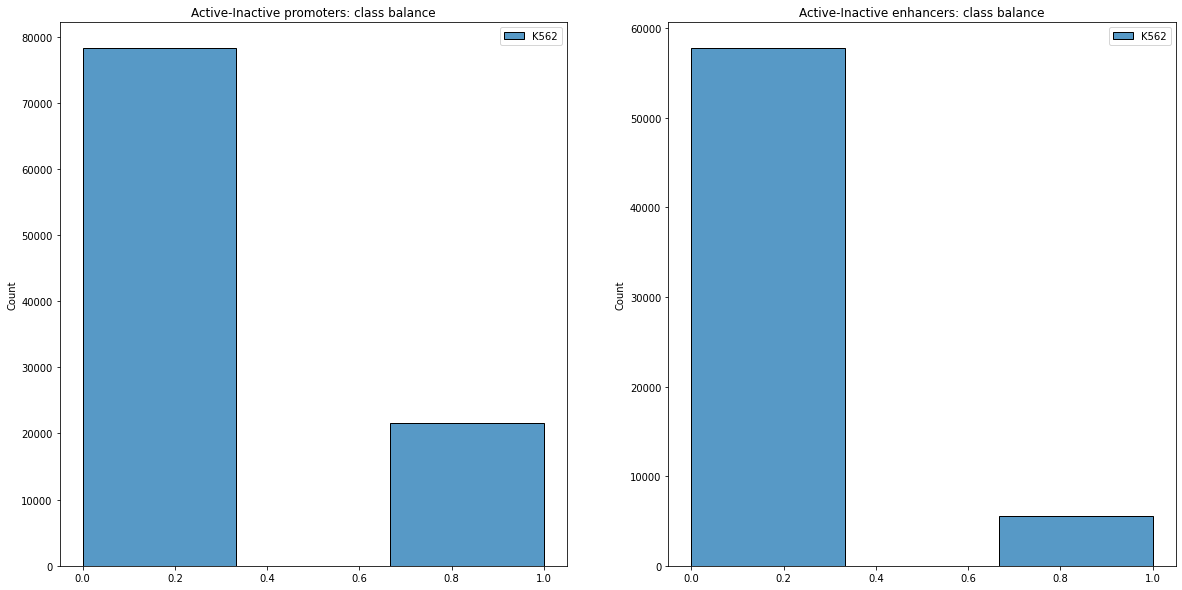

In [ ]:
_, axs = plt.subplots(ncols=2, figsize=(20, 10))
for i, (region, y) in enumerate(labels.items()):
    axes = sbn.histplot(
        data=y,
        bins=3,
        ax=axs[i],
    )

    axes.set_title(f"Active-Inactive {region}: class balance")
    counts = y[cell_line].value_counts()
    print(f"Active-Inactive {region} ratio: {counts[1]/counts[0]}")
    print(f"Active fraction in {region}: {counts[1]/(counts[0]+counts[1])}")

# Data preprocessing

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import RobustScaler

def build_preprocess_pipeline() -> Pipeline:
    """Creates a Pipeline for the preprocessing phase.
    
    The step performed during the pipeline are dropping costant feature from the
    dataset, imputing NaN values with the median and finally scaling the data
    removing the median and appling the IQR.
    
    Returns:
        A Sklearn Pipeline with the described step set.
    
    """
    # by default, VarianceThreshold removes costant features from the dataset
    return Pipeline([("drop_costant_feature", VarianceThreshold()),
                     ("impute", SimpleImputer(strategy="median")),
                     ("scale", RobustScaler())])

Build the preprocessing Pipeline and apply it to both datasets. 

In [10]:
preprocess_pipeline = build_preprocess_pipeline()
for region, X in epigenomes.items():
    # save index and column to create a new DataFrame, since `fit_transform`
    # returns an array
    index = X.index
    columns = X.columns
    epigenomes[region] = pd.DataFrame(data=preprocess_pipeline.fit_transform(X),
                                      index=index,
                                      columns=columns)

## Feature distribution

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def get_n_most_different(distances: np.ndarray, n: int) -> T.List[np.ndarray]:
    """Returns the indexes of the n most different distances.

    Given the distance matrix, sort the values according to their mean in
    descending order, and then extract the first n values.

    Args:
      distances: distance matrix
      n: number of most different features to consider

    Returns:
      The indexes of the n most different features.
    """
    return np.argsort(-np.mean(distances, axis=1).flatten())[:n]

Top 5 different features from promoters.


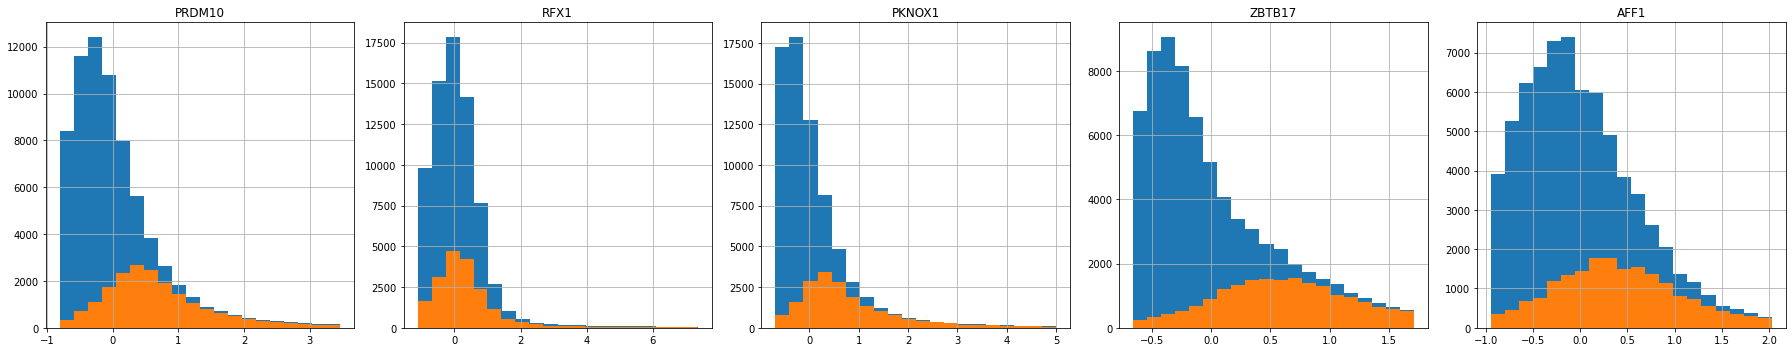

Top 5 different features from enhancers.


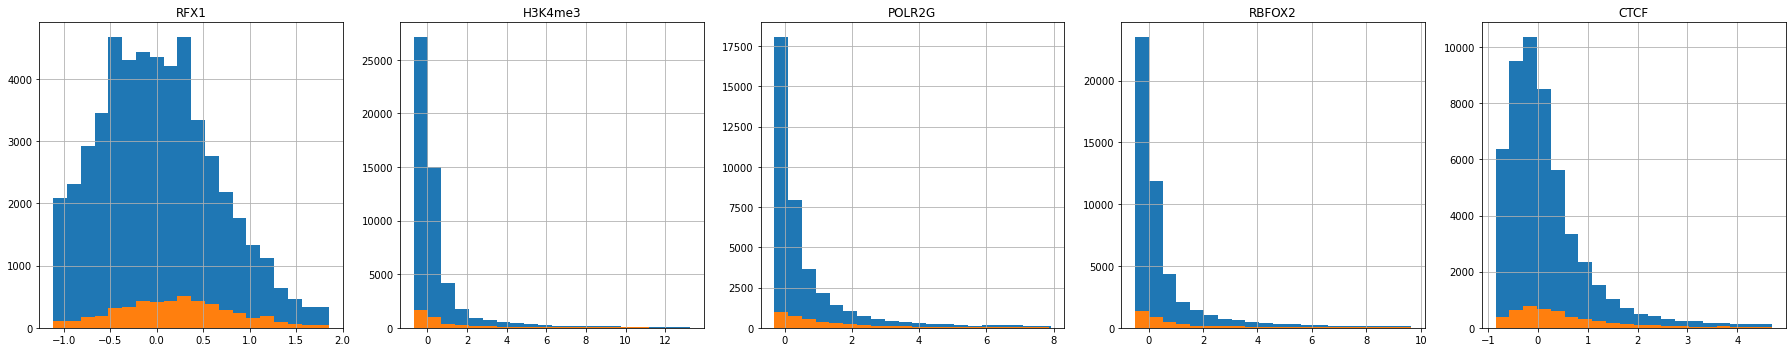

In [ ]:
top_number = 5

for region, X in epigenomes.items():
    # compute the distance matrix and extract the top 5 different columns
    dist = euclidean_distances(X.T)
    most_distance_columns_indices = get_n_most_different(dist, top_number)
    columns = X.columns[most_distance_columns_indices]
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
    print(f"Top {top_number} different features from {region}.")
    for column, axis in zip(columns, axes.flatten()):
        # clip the values of 5 and 95 quantile
        head, tail = X[column].quantile([0.05, 0.95]).values.ravel()
        
        # get the values that are inside the clipped range
        mask = ((X[column] < tail) & (X[column] > head)).values
        
        cleared_x = X[column][mask]
        cleared_y = labels[region].values.ravel()[mask]
        
        cleared_x[cleared_y==0].hist(ax=axis, bins=20)
        cleared_x[cleared_y==1].hist(ax=axis, bins=20)

        axis.set_title(column)
    fig.tight_layout()
    plt.show()

# Verify output correlation

In order to verify the correlation between the features and the output value, first compute the Pearson correlation coefficient and the Spearman correlation coefficient, and then compute the MIC test only
on the suggested features.

In [ ]:
from scipy.stats import pearsonr

def pearson_corr_output(X: pd.DataFrame,
                        y: np.ndarray,
                        region: str,
                        p_value_threshold: float = 0.01) -> T.Set:
    """Finds the uncorrelated features according to Pearson coefficient.
    
    Args:
      X: the dataset to consider
      y: the labels of the given dataset
      region: the region of the dataset
      p_value_threshold: maximum number to consider a feature as correlated

    Returns:
      A set of strings that represents the uncorrelated features with the
      output.
    """
    uncorrelated_features_with_output = set()

    for feature in tqdm(X.columns,
                        desc=f"Running Person test for {region}",
                        dynamic_ncols = True,
                        leave = False):
        correlation, p_value = pearsonr(X[feature].values.ravel(), y)
        if p_value > p_value_threshold:
            uncorrelated_features_with_output.add(feature)

    return uncorrelated_features_with_output


In [ ]:
from scipy.stats import spearmanr


def spearman_corr_output(X: pd.DataFrame,
                         y: np.ndarray,
                         region: str,
                         p_value_threshold: float = 0.01) -> T.Set:
    """Finds the uncorrelated features according to Spearman coefficient.
    
    Args:
      X: the dataset to consider
      y: the labels of the given dataset
      region: the region of the dataset
      p_value_threshold: maximum number to consider a feature as correlated

    Returns:
      A set of strings that represents the uncorrelated features with the
      output.

    """
    uncorrelated_features_with_output = set()
    for feature in tqdm(X.columns,
                        desc= f"Running Spearman test for {region}",
                        dynamic_ncols = True,
                        leave = False):
        correlation, p_value = spearmanr(X[feature].values.ravel(), y)
        if p_value > p_value_threshold:
            uncorrelated_features_with_output.add(feature)

    return uncorrelated_features_with_output

In [ ]:
from minepy import MINE

#@Cache(
    # cache_path="/content/drive/MyDrive/bio-data/outcorr/mine/{region}/{_hash}.pkl.gz",
    # args_to_ignore=["X", "y", "uncorrelated_features"]
# )
def mic_corr_output(X: pd.DataFrame,
                    y: np.ndarray,
                    region: str,
                    uncorrelated_features: T.Dict,
                    score_threshold: float = 0.05) -> T.Dict:
    """Finds the uncorrelated features according to MIC score.
    
    Args:
      X: the dataset to consider
      y: the labels of the given dataset
      region: the region of the dataset
      uncorrelated_features: dictionary of region as key and set of features as
                             value to test
      score_threshold: maximum number to consider a feature as correlated

    Returns:
      A dictionary where keys are the task names and values are the set of
      features that uncorrelated with the output.
    """

    for feature in tqdm(uncorrelated_features[region],
                        desc = f"Computing MIC score for {region}",
                        dynamic_ncols = True,
                        leave = False):
        mine = MINE()
        mine.compute_score(X[feature].values.ravel(), y)
        score = mine.mic()
        if score >= score_threshold:
            print(f"{feature} is not correlated for MIC")
            uncorrelated_features[region].remove(feature)

    return uncorrelated_features

Create the dictionary of feature set and compute Pearson and Spearman correlation.

In [ ]:
uncorrelated_features_with_output = {
    region: set()
    for region in epigenomes.keys()
}

for region, X in epigenomes.items():
    uncorrelated_features_with_output[region] = pearson_corr_output(
        X,
        labels[region].values.ravel(),
        region,
    )
    uncorrelated_features_with_output[region] = spearman_corr_output(
        X,
        labels[region].values.ravel(),
        region,
    )

print(f"The following features have no correlation with the output: {uncorrelated_features_with_output}")

The following features have no correlation with the output: {'promoters': {'ZBTB8A', 'KLF10', 'PRMT5', 'FOXA1'}, 'enhancers': {'SUZ12', 'U2AF2', 'SRSF7', 'FOXJ3', 'RBM17', 'EWSR1'}}


Compute MIC score only on the previously created dictionary.

In [ ]:
for region, X in epigenomes.items():
    uncorrelated_features_with_output = mic_corr_output(
        X,
        labels[region].values.ravel(),
        region,
        uncorrelated_features_with_output,
    )

Remove the uncorrelated features from the datasets. 

In [ ]:
for region, X in epigenomes.items():
    last_shape = X.shape
    epigenomes[region] = X.drop(columns=[
        c
        for c in uncorrelated_features_with_output[region]
        if c in X.columns                     
    ])
    print(f"{region} now has shape {epigenomes[region].shape} (last was {last_shape})")

promoters now has shape (99881, 425) (last was (99881, 429))
enhancers now has shape (63285, 423) (last was (63285, 429))


# Feature Correlation

Performing feature correlation helps to reduce the required amount of memory to store the dataset, since linearly correlated features give no additional information during the training phase.
To accomplish this task, the Pearson correlation coefficient is used.

In [ ]:
from scipy.stats import entropy
from scipy.stats import pearsonr
from typing import List

def features_correlation(X: pd.DataFrame, region: str) -> T.List:
    """Computes the correlation between the features of the dataset.

    Create a list of correlation according to the Pearson coefficient between
    the features of the given data.

    Args:
      X: the dataset to consider
      region: the region of interest

    Returns:
      A list of tuple of the form:
        (correlation score, p_value, first feature, second feature)
    """
    scores = []

    for i, feature_1 in tqdm(enumerate(X.columns),
                             total = len(X.columns),
                             desc = f"Running tests for {region}",
                             dynamic_ncols = True,
                             leave = False):
        for feature_2 in X.columns[i+1:]:
            correlation, p_value = pearsonr(X[feature_1].values.ravel(),
                                            X[feature_2].values.ravel())
            scores.append((correlation, p_value, feature_1, feature_2))

    return scores

Compute the correlation between the features and sort them in descresing order.

In [ ]:
feature_corr_scores = {
    region: list()
    for region in epigenomes.keys()
}

for region, X in epigenomes.items():
    feature_corr_scores[region] = features_correlation(X, region)
    
feature_corr_scores = {
    region: sorted(score, 
                   key=lambda x: np.abs(x[0]), 
                   reverse=True)
    for region, score in feature_corr_scores.items()
}

Plot correlation graph between the 3 most correlated features.

Most correlated features from promoters
Most correlated features from enhancers


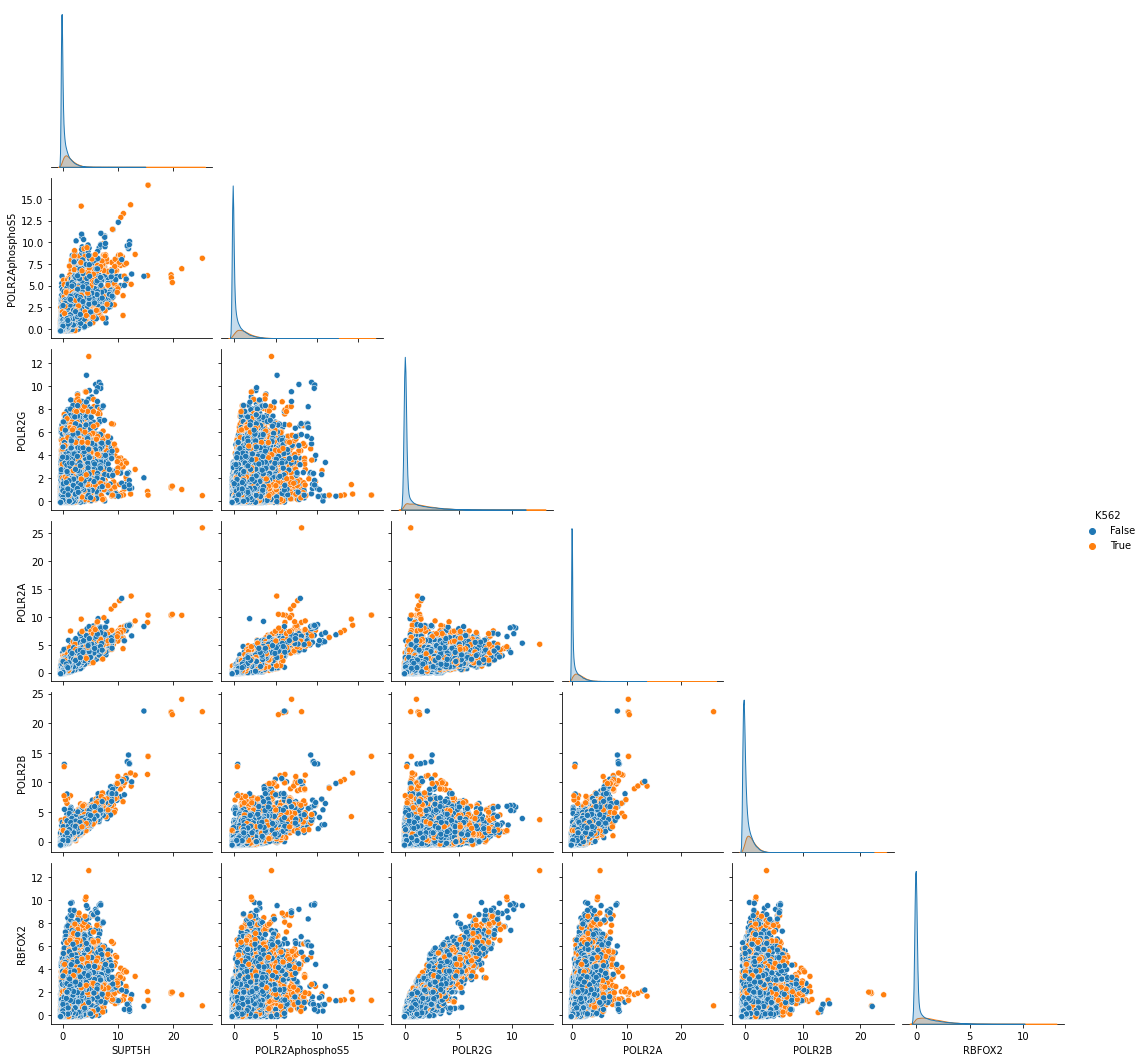

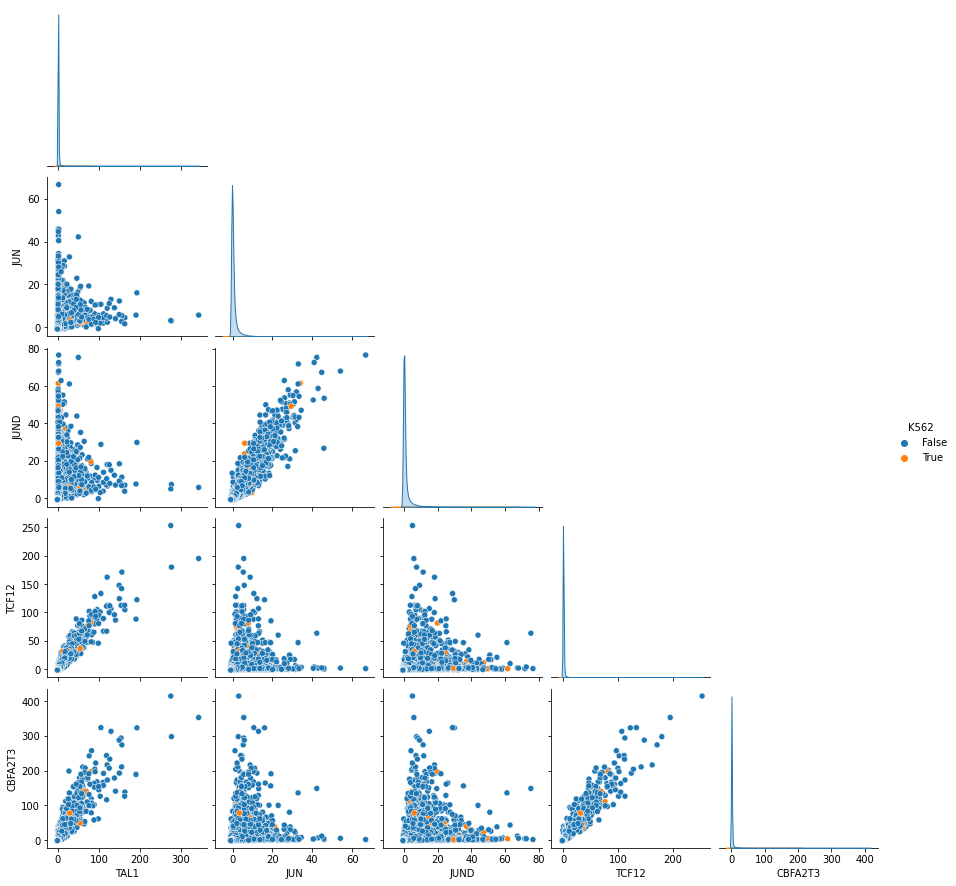

In [ ]:
for region, X in epigenomes.items():
    # creates the cartesian product between the top three correlated features
    _, _, firsts, seconds = list(zip(*feature_corr_scores[region][:3]))
    columns = list(set(firsts+seconds))
    print(f"Most correlated features from {region}")
    sbn.pairplot(pd.concat([X[columns], labels[region]], axis=1),
                 hue=labels[region].columns[0],
                 corner=True)

Now remove from the datasets the correlated features if their correlation score is greater than 0.95 and p_value less than 0.01. Keep the one with lower entropy.

In [ ]:
correlation_threshold = 0.95
p_value_threshold = 0.01

for region, X in epigenomes.items():
    last_shape = X.shape
    high_correlation = [
        (item[2], item[3])
        for item in feature_corr_scores[region]
        if item[0] > correlation_threshold and item[1] < p_value_threshold
    ]
    to_drop = []
    for f1, f2 in high_correlation:
        if entropy(X[f1]) > entropy(X[f2]):
            to_drop.append(f2)
        else:
            to_drop.append(f1)

    epigenomes[region] = X.drop(to_drop, axis=1)
    print(f"Dropping {to_drop} from {region} dataset...")
    print(f"New shape: {epigenomes[region].shape} (was {last_shape})")

Dropping ['RBFOX2'] from promoters dataset...
New shape: (99881, 428) (was (99881, 429))
Dropping [] from enhancers dataset...
New shape: (63285, 429) (was (63285, 429))


# Feature selection

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE
from multiprocess import cpu_count


def recursive_feature_elimination_with_sgd(X: pd.DataFrame,
                                           y: np.ndarray,
                                           region: str,
                                           holdout_number: int,
                                           n_features: int = 50,
                                           deletion_step: int = 10,
                                           verbose: int = 0) -> pd.DataFrame:
    """Performes an RFE procedure with SGD as internal predictor.
    
    The feauters are ranked according to the selection criterium of the SGD
    predictor, with log loss and L1 penalty, and removed by a step of 10
    features at a time. This procedure goes on until the required number of
    features is reached.
    
    Args:
      X: the dataset to consider
      y: the corresponding labels
      region: the region of interest
      holdout_number: the holdout number
      n_features: number of features to select
      deletion_step: number of features to remove at each step
      verbose: verbosity of the method
    
    Returns:
      A new dataframe with the selected features.
    """
    clf = SGDClassifier(loss="log",
                        penalty="l1",
                        verbose=verbose,
                        n_jobs=cpu_count(),
                        early_stopping=True,
                        class_weight="balanced")
    rfe = RFE(clf,
              n_features_to_select=n_features,
              step=deletion_step,
              verbose=verbose)
    rfe = rfe.fit(X, y)
    X_new = pd.DataFrame(rfe.transform(X),
                         columns=X.columns[rfe.get_support()],
                         index=X.index)
    return X_new


# Data visualization

In [ ]:
from sklearn.decomposition import PCA

def pca_decomposition(X: np.ndarray, components: int = 2) -> np.ndarray:
    """Applies the PCA decomposition to the given matrix.

    Args:
      X: the matrix to work with
      components: final number of components

    Returns:
      The decomposed matrix.
    """
    return PCA(n_components=components, random_state=1234).fit_transform(X)

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE

@Cache(
    cache_path="decomposition/tsne/{task}/{perplexity}_{dimensionality_threshold}_{_hash}.pkl.gz",
    args_to_ignore=["X"]
)
def tsne_decomposition(X:np.ndarray,
                       perplexity:int,
                       task:str,
                       dimensionality_threshold:int=50) -> np.ndarray:
    """Applies t-SNE decomposition to the given matrix.
    
    Args:
      X: the matrix to work with
      perplexity: the value of perplexity
      task: the name of the task under consideration
      dimensionality_threshold: number of components in which to reduce 
        the matrix (with PCA) before performing the method 
    
    Returns:
      The decomposed matrix.
    """
    if X.shape[1] > dimensionality_threshold:
        X = pca_decomposition(X, components=dimensionality_threshold)
    return TSNE(
        perplexity=perplexity,
        n_jobs=cpu_count(),
        random_state=42
    ).fit_transform(X)

Plot the decompositions of the datasets.

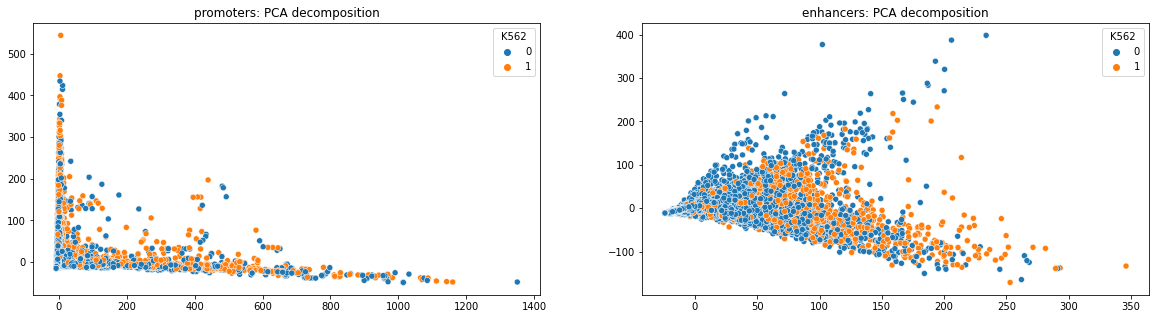

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i, (region, X) in enumerate(epigenomes.items()):
    pca_dec = pca_decomposition(X.values)
    
    ax = sbn.scatterplot(x=pca_dec.T[0],
                         y=pca_dec.T[1],
                         hue=labels[region][cell_line],
                         ax=axs[i])
    ax.set_title(f"{region}: PCA decomposition")

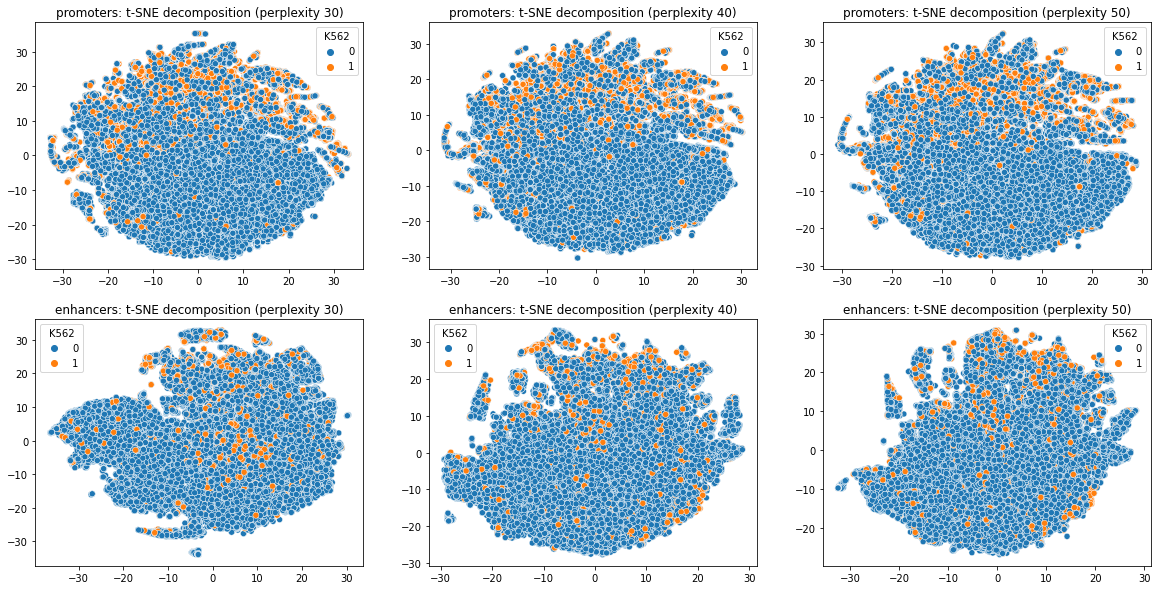

In [ ]:
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, (region, X) in enumerate(epigenomes.items()):
    for j, perplexity in enumerate((30, 40, 50)):
        tsne_dec = tsne_decomposition(X.values,
                                      perplexity=perplexity,
                                      task=region,
                                      dimensionality_threshold=50)
        ax = sbn.scatterplot(x=tsne_dec.T[0],
                             y=tsne_dec.T[1],
                             hue=labels[region][cell_line],
                             ax=axs[i][j])
        ax.set_title(
            f"{region}: t-SNE decomposition (perplexity {perplexity})")

# Model evaluation

In [11]:
from sanitize_ml_labels import sanitize_ml_labels
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score

def evaluate_all_model_prediction(y_train_true: np.ndarray,
                                  y_train_pred: np.ndarray,
                                  y_test_true: np.ndarray,
                                  y_test_pred: np.ndarray,
                                  model_name: str,
                                  task_name: str,
                                  holdout_number: int,
                                  use_feature_selection: bool) -> T.Dict[str, float]:
    """Returns the evaluation of the given predictions.
    
    Args:
      y_train_true: ground truth labels used during training.
      y_train_pred: training predictions
      y_test_true: ground truth labels used for test.
      y_test_pred: test predictions
      model_name: name of the model used.
      task_name: name of the task to work with.
      holdout_number: number of the holdout.
      use_feature_selection: whether the model is trained using
        features selection or not.

    Returns:
      Dictionary with the performance metrics
    """
    common_informations = {
        "model_name": model_name,
        "task_name": task_name,
        "holdout_number": holdout_number,
        "use_feature_selection": "Yes" if use_feature_selection else "No",
    }
    return [
        {
            **evaluate_model_prediction(y_train_true, y_train_pred),
            "run_type": "train",
            **common_informations
        },
        {
            **evaluate_model_prediction(y_test_true, y_test_pred),
            "run_type": "test",
            **common_informations
        },
    ]


def evaluate_model_prediction(y_true: np.ndarray,
                              y_pred: np.ndarray) -> T.Dict[str, float]:
    """Returns the evaluation of the given predictions.

    By default, this method evaluates accuracy, AUROC and AUPRC.

    Args:
      y_true: the ground truth labels.
      y_pred: the predicted labels.
    
    Raises:
      ValueError: if the two given numpy arrays do not have the same shape.
    
    Returns:
      Dictionary with the performance metrics
    """
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    if y_true.shape != y_pred.shape:
        raise ValueError(
            "The two arrays do not have the same shape: {} != {}".format(
                y_true.shape, y_pred.shape
            )
        )
    float_metrics = average_precision_score, roc_auc_score
    int_metrics = (accuracy_score, )
    return {
        ** {
            sanitize_ml_labels(metric.__name__): metric(y_true, y_pred)
            for metric in float_metrics
        },
        ** {
            sanitize_ml_labels(metric.__name__): metric(
                y_true, 
                np.round(y_pred).astype(int)
            )
            for metric in int_metrics
        }
    }

In [12]:
from typing import Union
from tensorflow.keras.models import Model
from keras_mixed_sequence import MixedSequence, VectorSequence
from sklearn.ensemble import RandomForestClassifier

@Cache(
    cache_path="/content/drive/MyDrive/bio-data/training/{predictor_name}/{task_name}_{holdout_number}/{use_feature_selection}_{_hash}.csv.gz",
    args_to_ignore=["predictor", "X_train", "X_test", "y_train", "y_test"]
)
def train_random_forest(predictor: RandomForestClassifier,
                        X_train: np.ndarray,
                        y_train: np.ndarray,
                        X_test: np.ndarray,
                        y_test: np.ndarray,
                        task_name: str,
                        predictor_name: str,
                        holdout_number: int,
                        use_feature_selection: bool)-> pd.DataFrame:
    """Trains and evaluates the given predictor.
    
    By defualt, this method evaluates accuracy, AUROC and AUPRC on the test set.

    Args:
        predictor: A sklearn RandomModelClassifier to train.
        X_train: The training set.
        y_train: The labels corresponding to the training set.
        X_test: The test set.
        y_test: The labels corresponding to the test set.
        task_name: The name of the task where the predictor is trained on.
        predictor_name: The name of the predictor.
        holdout_number: The number of the holdout currently taken.
        use_feature_selection: Wheter the predictor is trained on a reduced 
          dataset.

    Returns:
        A dict where the keys are the name of the metrics ("accuracy", "AUROC",
        "AUPRC"), and the values are the respective scores.
    """
    
    predictor.fit(X_train, y_train)

    y_train_prediction = predictor.predict(X_train)
    y_test_prediction = predictor.predict(X_test)
    
    return pd.DataFrame(evaluate_all_model_prediction(
        y_train, y_train_prediction,
        y_test, y_test_prediction,
        predictor_name,
        task_name,
        holdout_number,
        use_feature_selection
    ))

In [13]:
from typing import Tuple

@Cache(
    cache_path="/content/drive/MyDrive/bio-data/training/{model_name}/{task}_{holdout_number}/{use_feature_selection}_{_hash}.csv.gz",
    args_to_ignore=["training_sequence", "model", "test_sequence"]
)
def train_model(model: Model,
                model_name: str,
                task: str,
                training_sequence: MixedSequence,
                test_sequence: MixedSequence,
                holdout_number: int,
                use_feature_selection: bool) -> pd.DataFrame:
    """Returns training history and model evaluations.
    
    Args:
      model: the model to train.
      model_name: the model name.
      task: the name of the task.
      training_sequence: the training sequence.
      test_sequence: the test sequence.
      holdout_number: the number of the current holdout.
      use_feature_selection: wheter the predictor is trained on a reduced
        dataset.  
    
    Returns:
      Tuple with training history dataframe and model evaluations dataframe.
    """
    model.fit(
        training_sequence,
        validation_data=test_sequence,
        epochs=1000,
        verbose=False,
        callbacks=[
                EarlyStopping("loss", min_delta=1e-3, patience=2, mode="min")
        ]
    )
    
    train_evaluation = dict(zip(model.metrics_names,
                                model.evaluate(training_sequence,
                                               verbose=False)))
    test_evaluation = dict(zip(model.metrics_names,
                               model.evaluate(test_sequence, verbose=False)))
    
    common_informations = {
        "model_name": model_name,
        "task_name": task,
        "holdout_number": holdout_number,
        "use_feature_selection": "Yes" if use_feature_selection else "No",
    }
        
    return pd.DataFrame([
        {
            **train_evaluation,
            "run_type": "train",
            **common_informations
        },
        {
            **test_evaluation,
            "run_type": "test",
            **common_informations
        },
    ])

# Model creation

In [14]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, ReLU, Concatenate, Layer, Reshape
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool1D, GlobalAveragePooling1D, GlobalMaxPool1D, Flatten
from tensorflow.keras import regularizers

from tensorflow.keras.optimizers import SGD, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from extra_keras_metrics import get_complete_binary_metrics, get_standard_binary_metrics,get_minimal_multiclass_metrics

from tqdm.keras import TqdmCallback
from keras_bed_sequence import BedSequence

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from multiprocess import cpu_count

def build_random_forest(n_estimators: int = 100,
                        max_depth: int = 5,
                        min_samples_leaf: int = 100,
                        verbose: bool = False,
                        random_state: int = 12345) -> RandomForestClassifier:
    return RandomForestClassifier(
        class_weight="balanced_subsample",
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        n_jobs=cpu_count(),
        verbose=verbose,
        random_state=random_state,
    )

## Feed-Forward Neural Network

In [16]:
def build_fixed_ffnn(input_shape: int,
                     regression: bool)-> T.Tuple[Model, Layer, Layer]:
    """Returns Feed-Forward Neural Network model for binary classification.
    
    Parameters
    -----------------------
    input_shape: int,
        Number of features in the input layer.
        
    Returns
    -----------------------
    Triple with model, input layer and output layer.
    """
    input_epigenomic_data = Input(shape=(input_shape,), name="epigenomic_data")
    hidden = Dense(256, activation="relu")(input_epigenomic_data)
    hidden = Dense(128, activation="relu")(hidden)
    last_hidden_ffnn = Dense(64, activation="relu")(hidden)
    if regression:
        output_ffnn = Dense(1, activation="linear")(last_hidden_ffnn)
    else:
        output_ffnn = Dense(1, activation="sigmoid")(last_hidden_ffnn)

    ffnn = Model(
        inputs=input_epigenomic_data,
        outputs=output_ffnn,
        name="RegressionFFNN" if regression else "BinaryFixedFFNN"
    )

    ffnn.compile(
        optimizer=SGD(
            learning_rate=0.1
        ),
        loss="mse" if regression else "binary_crossentropy",
        metrics=["mse"] if regression else get_minimal_multiclass_metrics()
    )
    return ffnn, input_epigenomic_data, last_hidden_ffnn

## CNN

In [17]:
def build_fixed_cnn(window_size: int,
                    regression: bool) -> T.Tuple[Model, Layer, Layer]:
    """Returns Convolutional Neural Network model for binary classification.
    
    Parameters
    -----------------------
    window_size: int,
        Size of the input genomic window.
        
    Returns
    -----------------------
    Triple with model, input layer and output layer.
    """

    input_sequence_data = Input(shape=(window_size, 4), name="sequence_data")
    hidden = Conv1D(64, kernel_size=5, activation="relu")(input_sequence_data)

    for _ in range(2):
        hidden = Conv1D(32, kernel_size=4, activation="relu")(hidden)
        #hidden = Dropout(rate=0.1)(hidden)
        hidden = MaxPool1D(pool_size=2)(hidden)
    
    hidden = GlobalAveragePooling1D()(hidden)
    hidden = Dense(64, activation="relu")(hidden)
    hidden = Dropout(rate=0.2)(hidden)
    hidden = Dense(32, activation="relu")(hidden)
    last_hidden_cnn = Dropout(rate=0.2)(hidden)
    if regression:
        output_cnn = Dense(1, activation="linear")(last_hidden_cnn)
    else:
        output_cnn = Dense(1, activation="sigmoid")(last_hidden_cnn)

    cnn = Model(
        inputs=input_sequence_data,
        outputs=output_cnn,
        name="RegressionCNN" if regression else "BinaryClassificationCNN",
    )

    cnn.compile(
        optimizer=Nadam(learning_rate=0.002),
        loss="mse" if regression else "binary_crossentropy",
        metrics=["mse"] if regression else get_minimal_multiclass_metrics(),
    )

    return cnn, input_sequence_data, last_hidden_cnn

## Multi Modal Neural Network

In [18]:
from typing import Optional

def build_binary_classification_mmnn(
    input_shape: Optional[int] = None,
    window_size: Optional[int] = None,
    input_epigenomic_data: Optional[Layer] = None,
    input_sequence_data: Optional[Layer] = None,
    last_hidden_ffnn: Optional[Layer] = None,
    last_hidden_cnn: Optional[Layer] = None,
    regression: bool = False,
)-> Model:
    """Returns Multi-Modal Neural Network model for binary classification.
    
    Implementative details
    -----------------------
    If the input shape / window size is not provided and the input layers and 
    the feature selection layers are provided, then the network will start
    to train from those layers (which are expected to be pre-trained).
    Conversely, it will create the submodules for the epigenomic and sequence
    data ex-novo.
    
    Parameters
    -----------------------
    input_shape: Optional[int] = None,
        Number of features in the input layer.
        Either the input shape or the input and output layers of the FFNN
        must be provided.
    window_size: int,
        Size of the input genomic window.
        Either the window size or the input and output layers of the CNN
        must be provided.
    input_epigenomic_data: Optional[Layer] = None,
        Input for the epigenomic data from a FFNN model.
        Either the input shape or the input and output layers of the FFNN
        must be provided.
    input_sequence_data: Optional[Layer] = None,
        Input for the sequence data from a CNN model.
        Either the window size or the input and output layers of the CNN
        must be provided.
    last_hidden_ffnn: Optional[Layer] = None,
        Feature selection layer from a FFNN model.    
        Either the input shape or the input and output layers of the FFNN
        must be provided.
    last_hidden_cnn: Optional[Layer] = None,
        Feature selection layer from a CNN model.
        Either the window size or the input and output layers of the CNN
        must be provided.
        
    Raises
    -----------------------
    ValueError,
        If the input shape is not provided and the input layer and feature selection
        layer of the FFNN are not provided.
    ValueError,
        If the window size is not provided and the input layer and feature selection
        layer of the CNN are not provided.
        
    Returns
    -----------------------
    The created model.
    """
    if input_shape is None and (last_hidden_ffnn is None or input_epigenomic_data is None):
        raise ValueError(
            "Either the input shape or the features selection layer and the input epigenomic "
            "layer must be provided."
        )
    if window_size is None and (last_hidden_cnn is None or input_sequence_data is None):
        raise ValueError(
            "Either the input shape or the features selection layer and the input sequence "
            "layer must be provided."
        )
        
    if input_shape is not None:
        _, input_epigenomic_data, last_hidden_ffnn = build_fixed_ffnn(
            input_shape,
            regression)
        
    if window_size is not None:
        _, input_sequence_data, last_hidden_cnn = build_fixed_cnn(window_size,
                                                                  regression)
        
    concatenation_layer = Concatenate()([
        last_hidden_ffnn,
        last_hidden_cnn
    ])

    last_hidden_mmnn = Dense(64, activation="relu")(concatenation_layer)
    if regression:
        output_mmnn = Dense(1, activation="linear")(last_hidden_mmnn)
    else:
        output_mmnn = Dense(1, activation="sigmoid")(last_hidden_mmnn)

    name = []
    if regression:
        name.append("Regression")
    if input_shape is None:
        name.append("BoostedMMNN")
    else:
        name.append("MMNN")

    mmnn = Model(inputs=[input_epigenomic_data, input_sequence_data],
                 outputs=output_mmnn,
                 name=''.join(name))

    mmnn.compile(
        optimizer="nadam",
        loss="mse" if regression else "binary_crossentropy",
        metrics=["mse"] if regression else get_minimal_multiclass_metrics()
    )

    return mmnn

## Create input sequence

In [19]:
from keras_bed_sequence import BedSequence

def get_ffnn_sequence(X: np.ndarray,
                      y: np.ndarray,
                      batch_size: int = 1024) -> MixedSequence:
    """Returns sequence to train a FFNN model on epigenomic data.
    
    Implementative details
    -------------------------
    This sequence can be used for either binary classification or
    for regresssion, just change the y accordingly.
    
    Parameters
    -------------------------
    X: np.ndarray,
        The vector from where to extract the epigenomic data.
    y: np.ndarray,
        The values the model should predict.
    batch_size: int = 1024,
        The size of the batches to generate
    
    Returns
    --------------------------
    MixedSequence object to train a FFNN.
    """
    return MixedSequence(
        x={
            "epigenomic_data": VectorSequence(
                X,
                batch_size
            )
        },
        y=VectorSequence(
            y,
            batch_size=batch_size
        )
    )


def get_cnn_sequence(genome: Genome,
                     bed: pd.DataFrame,
                     y: np.ndarray,
                     batch_size: int = 1024) -> MixedSequence:
    """Returns sequence to train a CNN model on genomic sequences.
    
    Implementative details
    -------------------------
    This sequence can be used for either binary classification or
    for regresssion, just change the y accordingly.
    
    Parameters
    -------------------------
    genome: Genome,
        The genome from where to extract the genomic sequence.
    bed: pd.DataFrame,
        The BED file coordinates describing where to extract the sequences.
    y: np.ndarray,
        The values the model should predict.
    batch_size: int = 1024,
        The size of the batches to generate
    
    Returns
    --------------------------
    MixedSequence object to train a CNN.
    """
    return MixedSequence(
        x={
            "sequence_data": BedSequence(
                genome,
                bed,
                batch_size=batch_size,
            )
        },
        y=VectorSequence(
            y,
            batch_size=batch_size
        )
    )


def get_mmnn_sequence(genome: Genome,
                      bed: pd.DataFrame,
                      X: np.ndarray,
                      y: np.ndarray,
                      batch_size: int = 1024) -> MixedSequence:
    """Returns sequence to train a MMNN model on both genomic sequences and epigenomic data.
    
    Implementative details
    -------------------------
    This sequence can be used for either binary classification or
    for regresssion, just change the y accordingly.
    
    Parameters
    -------------------------
    genome: Genome,
        The genome from where to extract the genomic sequence.
    bed: pd.DataFrame,
        The BED file coordinates describing where to extract the sequences.
    X: np.ndarray,
        The vector from where to extract the epigenomic data.
    y: np.ndarray,
        The values the model should predict.
    batch_size: int = 1024,
        The size of the batches to generate
    
    Returns
    --------------------------
    MixedSequence object to train a MMNN.
    """
    return MixedSequence(
        x={
            "sequence_data": BedSequence(
                genome,
                bed,
                batch_size=batch_size,
            ),
            "epigenomic_data": VectorSequence(
                X,
                batch_size
            )
        },
        y=VectorSequence(
            y,
            batch_size=batch_size
        )
    )

# Train and evaluate the models

In [20]:
#from collections.abc import Callable

@Cache(
    cache_path="/content/drive/MyDrive/bio-data/seqAndTraining/{predictor_name}/{task_name}_{holdout_number}/{feature_selection}_{_hash}.csv.gz",
    args_to_ignore=["predictor", "X_train", "X_test", "y_train", "y_test", "genome", "train_bed", "test_bed", "f_get_sequence"]
)
def create_seq_and_evaluate_model(
        X_train: T.Optional[np.ndarray],
        X_test: T.Optional[np.ndarray],
        genome: T.Optional[Genome],
        train_bed: T.Optional[BedSequence],
        test_bed: T.Optional[BedSequence],
        y_train: np.ndarray,
        y_test: np.ndarray,
        predictor: Model,
        predictor_name: str,
        f_get_sequence: T.Callable[[np.ndarray, np.ndarray, int], MixedSequence],
        task_name: str,
        holdout_number: int,
        feature_selection: bool,
        batch_size: int = 1024,
) -> pd.DataFrame:
    if X_train is None and X_test is None: # train a cnn
        if genome is None or train_bed is None or test_bed is None:
            # error, in this branch all the three elements must be supplied
            raise ValueError("To train a CNN, genome, train_bed and test_bed"
                             " must be supplied.")
        train_seq = f_get_sequence(genome, train_bed, y_train, batch_size)
        test_seq = f_get_sequence(genome, test_bed, y_test, batch_size)
    elif X_train is not None and X_test is not None:
        if genome is None and train_bed is None and test_bed is None:
            # we want to train a ffnn
            train_seq = f_get_sequence(X_train, y_train, batch_size)
            test_seq = f_get_sequence(X_test, y_test, batch_size)
        elif (genome is not None and train_bed is not None
                 and test_bed is not None):
            # we want to train a mmnn
            train_seq = f_get_sequence(genome, train_bed, X_train, y_train)
            test_seq = f_get_sequence(genome, test_bed, X_test, y_test)
        else:
            raise ValueError("When X_train and X_test are supplied, genome, "
                             "train_bed and test_bed must be either supplied"
                             "or not.")
    else:
        raise ValueError("The combination of input is not correct. Please refer"
                         " to the docstring for further explanations.")

    return train_model(predictor,
                       predictor.name,
                       task_name,
                       train_seq,
                       test_seq,
                       holdout_number,
                       feature_selection)


First, retrive again the datasets to remove any kind of data leakege.

In [ ]:
aeie_X, aeie_y = active_enhancers_vs_inactive_enhancers(
    cell_line=cell_line,
    assembly=genome_assembly,
    window_size=window_size,
    root="/content/drive/MyDrive/bio-data/",
    verbose=1,
    binarize=True
)

apip_X, apip_y = active_promoters_vs_inactive_promoters(
    cell_line=cell_line,
    assembly=genome_assembly,
    window_size=window_size,
    root="/content/drive/MyDrive/bio-data/",
    verbose=1,
    binarize=True
)

epigenomes = {
    "promoters": apip_X,
    "enhancers": aeie_X,
}

labels = {
    "promoters": binarize(apip_y, cell_line),
    "enhancers": binarize(aeie_y, cell_line),
}

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

n_splits = 10
test_size = 0.2
random_state = 9012

stratified_split = StratifiedShuffleSplit(n_splits = n_splits,
                                          test_size = test_size,
                                          random_state = random_state)

In [25]:
all_performance_classification = {}

preprocess = build_preprocess_pipeline()

for task_name, X in epigenomes.items():
    bed = to_bed(X)
    all_performance_classification[task_name] = []
    for holdout_number, (train_indices, test_indices) in tqdm(
        enumerate(stratified_split.split(X, labels[task_name])),
        total=n_splits,
        leave=False,
        desc="Computing holdouts for {}".format(task_name)
    ):
        # all_performance_classification[task_name] + loop_body(
        #    X,
        #    labels,
        #    genome,
        #    task_name,
        #    bed,
        #    holdout_number,
        #    train_indices,
        #    test_indices,
        # )
       # train and test set
       train_bed, test_bed = bed.iloc[train_indices], bed.iloc[test_indices]
       X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
       y_train, y_test = (labels[task_name].iloc[train_indices],
                          labels[task_name].iloc[test_indices])

       train_index = X_train.index
       train_columns = X_train.columns
       test_index = X_test.index
       test_columns = X_test.columns
       X_train = pd.DataFrame(data=preprocess.fit_transform(X_train),
                              index=train_index,
                              columns=train_columns)
       X_test =  pd.DataFrame(data=preprocess.transform(X_test),
                              index=test_index,
                              columns=test_columns)
       y_train = y_train.values.flatten()
       y_test = y_test.values.flatten()

       for feature_selection in (False, True):
           if feature_selection:
               X_train = recursive_feature_elimination_with_sgd(X_train,
                                                                y_train,
                                                                task_name,
                                                                holdout_number,
                                                                n_features=250)
               X_test = X_test[X_train.columns]
           
           # creation of the models
           random_forest = build_random_forest()
           ffnn, input_epigenomic_data, last_hidden_ffnn = build_fixed_ffnn(
               X_train.shape[1], False)
           cnn, input_sequence_data, last_hidden_cnn = build_fixed_cnn(
               X_train.shape[1], False)
           mmnn1 = build_binary_classification_mmnn(
               input_shape=X_train.shape[1], 
               window_size=window_size,
               regression=False)
           mmnn2 = build_binary_classification_mmnn(
               input_sequence_data=input_sequence_data,
               input_epigenomic_data=input_epigenomic_data,
               last_hidden_ffnn=last_hidden_ffnn,
               last_hidden_cnn=last_hidden_cnn,
               regression=False,
           )
           #if holdout_number == 0 and not feature_selection: 
           #    cnn.summary()
           #    ffnn.summary()
           #    mmnn1.summary()
           #    mmnn2.summary()

           # Train firstly the random forest because it uses a different 
           # method.
           performance = train_random_forest(random_forest,
                                             X_train.values,
                                             y_train,
                                             X_test.values,
                                             y_test,
                                             task_name,
                                             "RandomForest",
                                             holdout_number,
                                             feature_selection)

           all_performance_classification[task_name].append(performance)

           # Now, train the neural network models.
           for predictor, train_x, test_x, genome, bed_train, bed_test, f_get_sequence in tqdm(
               ((ffnn, X_train.values, X_test.values, None, None, None, 
                 get_ffnn_sequence),
                (cnn, None, None, genome, train_bed, test_bed, 
                 get_cnn_sequence),
                (mmnn1, X_train.values, X_test.values, genome, train_bed,
                 test_bed, get_mmnn_sequence),
                (mmnn2, X_train.values, X_test.values, genome, train_bed, 
                 test_bed, get_mmnn_sequence),
               ),
               desc="Training models",
               leave=False,
           ):
               performance = create_seq_and_evaluate_model(
                   train_x, 
                   test_x,
                   genome,
                   bed_train,
                   bed_test,
                   y_train,
                   y_test,
                   predictor,
                   predictor.name,
                   f_get_sequence,
                   task_name,
                   holdout_number,
                   feature_selection,
               )
               all_performance_classification[task_name].append(performance)
           

    all_performance_classification[task_name] = pd.concat(
        all_performance_classification[task_name])

Computing holdouts for promoters:   0%|          | 0/10 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Computing holdouts for enhancers:   0%|          | 0/10 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training models:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
from IPython.display import display

# join the 'accuracy' columns, since training a Keras Model and a Random Forest
# gives diffent names for the same metric.
for region, X in all_performance_classification.items():
    print("="*30)
    print(region.upper())
    print("="*30)    
    X["accuracy"] = X["accuracy"].fillna(0) + X["Accuracy"].fillna(0)
    X.reset_index(drop=True, inplace=True)
    X.drop(["Accuracy", "loss", "recall", "precision"],
           axis=1,
           inplace=True,
           errors="ignore")
    display(X)


PROMOTERS


,AUPRC,AUROC,run_type,model_name,task_name,holdout_number,use_feature_selection,accuracy
0,0.475755,0.826345,train,RandomForest,promoters,0,No,0.788671
1,0.487735,0.833280,test,RandomForest,promoters,0,No,0.797868
2,0.769559,0.927641,train,BinaryFixedFFNN,promoters,0,No,0.871771
3,0.652586,0.900816,test,BinaryFixedFFNN,promoters,0,No,0.845272
4,0.455868,0.776094,train,BinaryClassificationCNN,promoters,0,No,0.789648
...,...,...,...,...,...,...,...,...
195,0.471068,0.781994,test,BinaryClassificationCNN,promoters,9,Yes,0.793262
196,0.907792,0.975818,train,MMNN,promoters,9,Yes,0.924447
197,0.636198,0.885543,test,MMNN,promoters,9,Yes,0.841818
198,0.944520,0.983919,train,BoostedMMNN,promoters,9,Yes,0.939127


ENHANCERS


,AUPRC,AUROC,run_type,model_name,task_name,holdout_number,use_feature_selection,accuracy
0,0.180505,0.733433,train,RandomForest,enhancers,0,No,0.753615
1,0.178729,0.728681,test,RandomForest,enhancers,0,No,0.757209
2,0.590649,0.897135,train,BinaryFixedFFNN,enhancers,0,No,0.928854
3,0.292667,0.759181,test,BinaryFixedFFNN,enhancers,0,No,0.913092
4,0.113205,0.557378,train,BinaryClassificationCNN,enhancers,0,No,0.912716
...,...,...,...,...,...,...,...,...
195,0.126482,0.583576,test,BinaryClassificationCNN,enhancers,9,Yes,0.912697
196,0.972446,0.996709,train,MMNN,enhancers,9,Yes,0.981848
197,0.221650,0.691528,test,MMNN,enhancers,9,Yes,0.899028
198,0.973854,0.996649,train,BoostedMMNN,enhancers,9,Yes,0.985028


## Barplot

Plot the performance of all the predictors in train and test set.

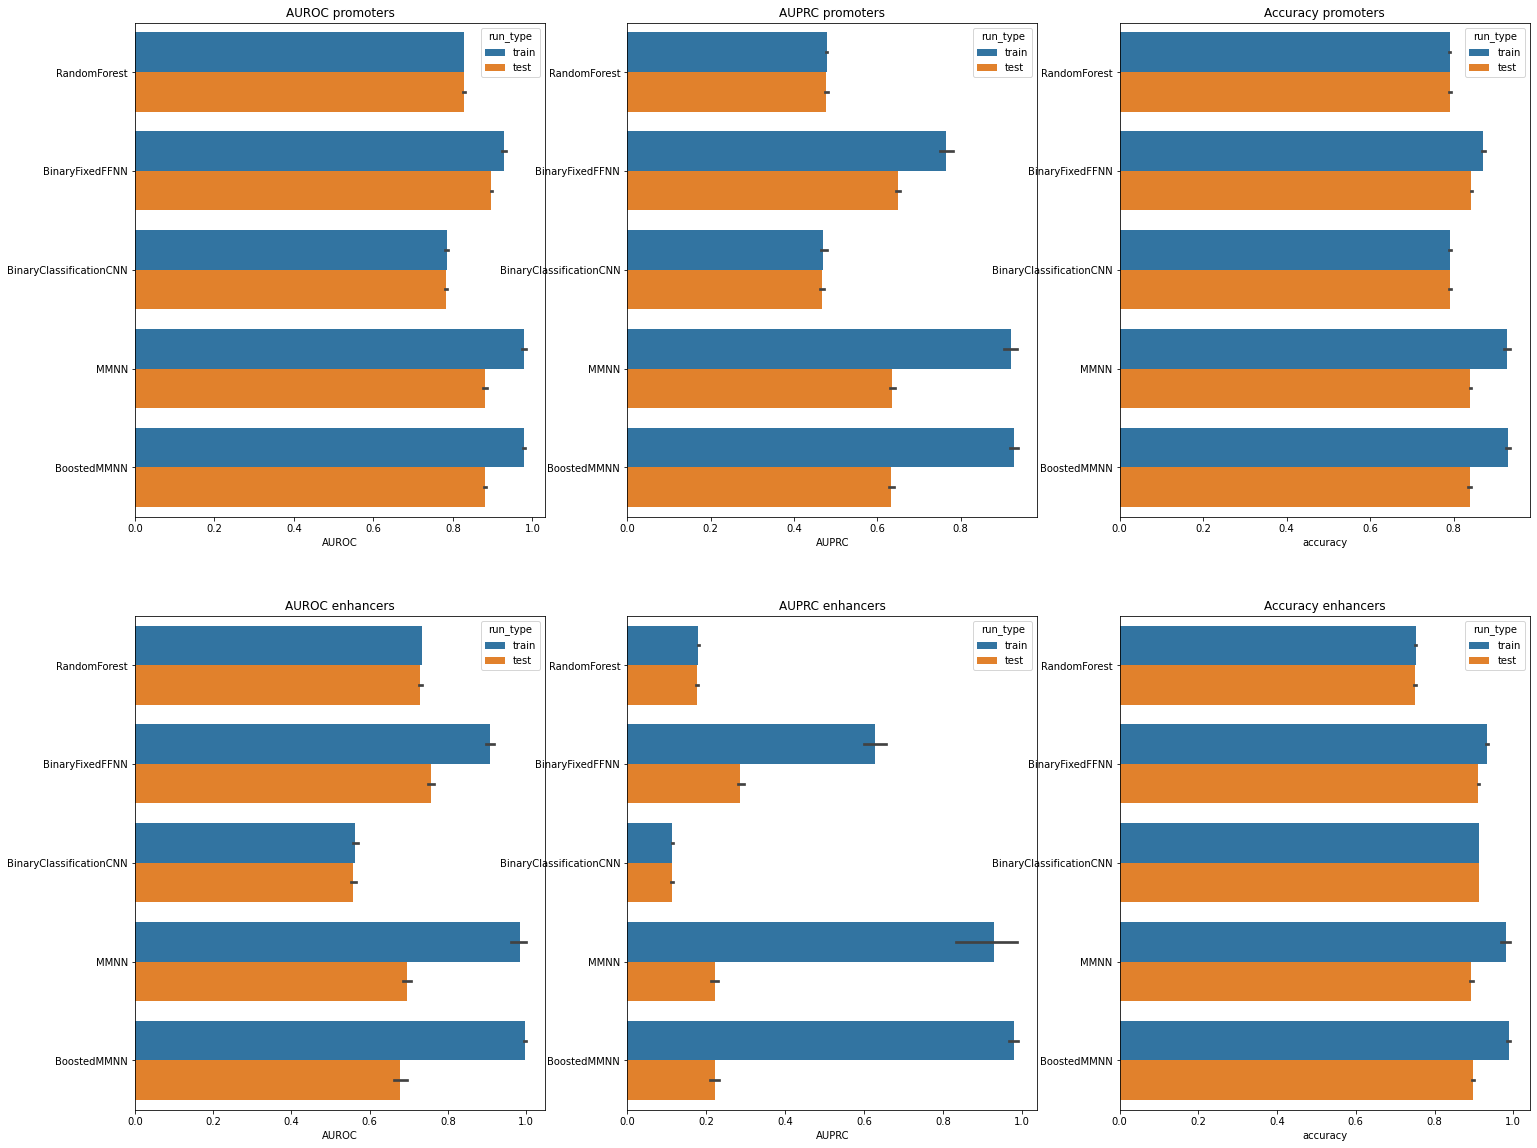

In [27]:
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 20), squeeze=True)

for i, (task_name, dataframe) in enumerate(
    all_performance_classification.items()
):
    without_fs = dataframe[(dataframe.use_feature_selection == "No") | 
                           (dataframe.use_feature_selection == False)]
    sbn.barplot(x="AUROC",
                y="model_name",
                data=without_fs,
                hue="run_type",
                orient="h",
                ax=axs[i][0])
    _ = axs[i][0].set_title(f"AUROC {task_name}")
    axs[i][0].set_ylabel("")
    
    sbn.barplot(x="AUPRC",
                y="model_name",
                data=without_fs,
                hue="run_type",
                orient="h",
                ax=axs[i][1])
    _ = axs[i][1].set_title(f"AUPRC {task_name}")
    axs[i][1].set_ylabel("")
    
    sbn.barplot(x="accuracy",
                y="model_name",
                data=without_fs,
                hue="run_type",
                orient="h",
                ax=axs[i][2])
    _ = axs[i][2].set_title(f"Accuracy {task_name}")
    axs[i][2].set_ylabel("")

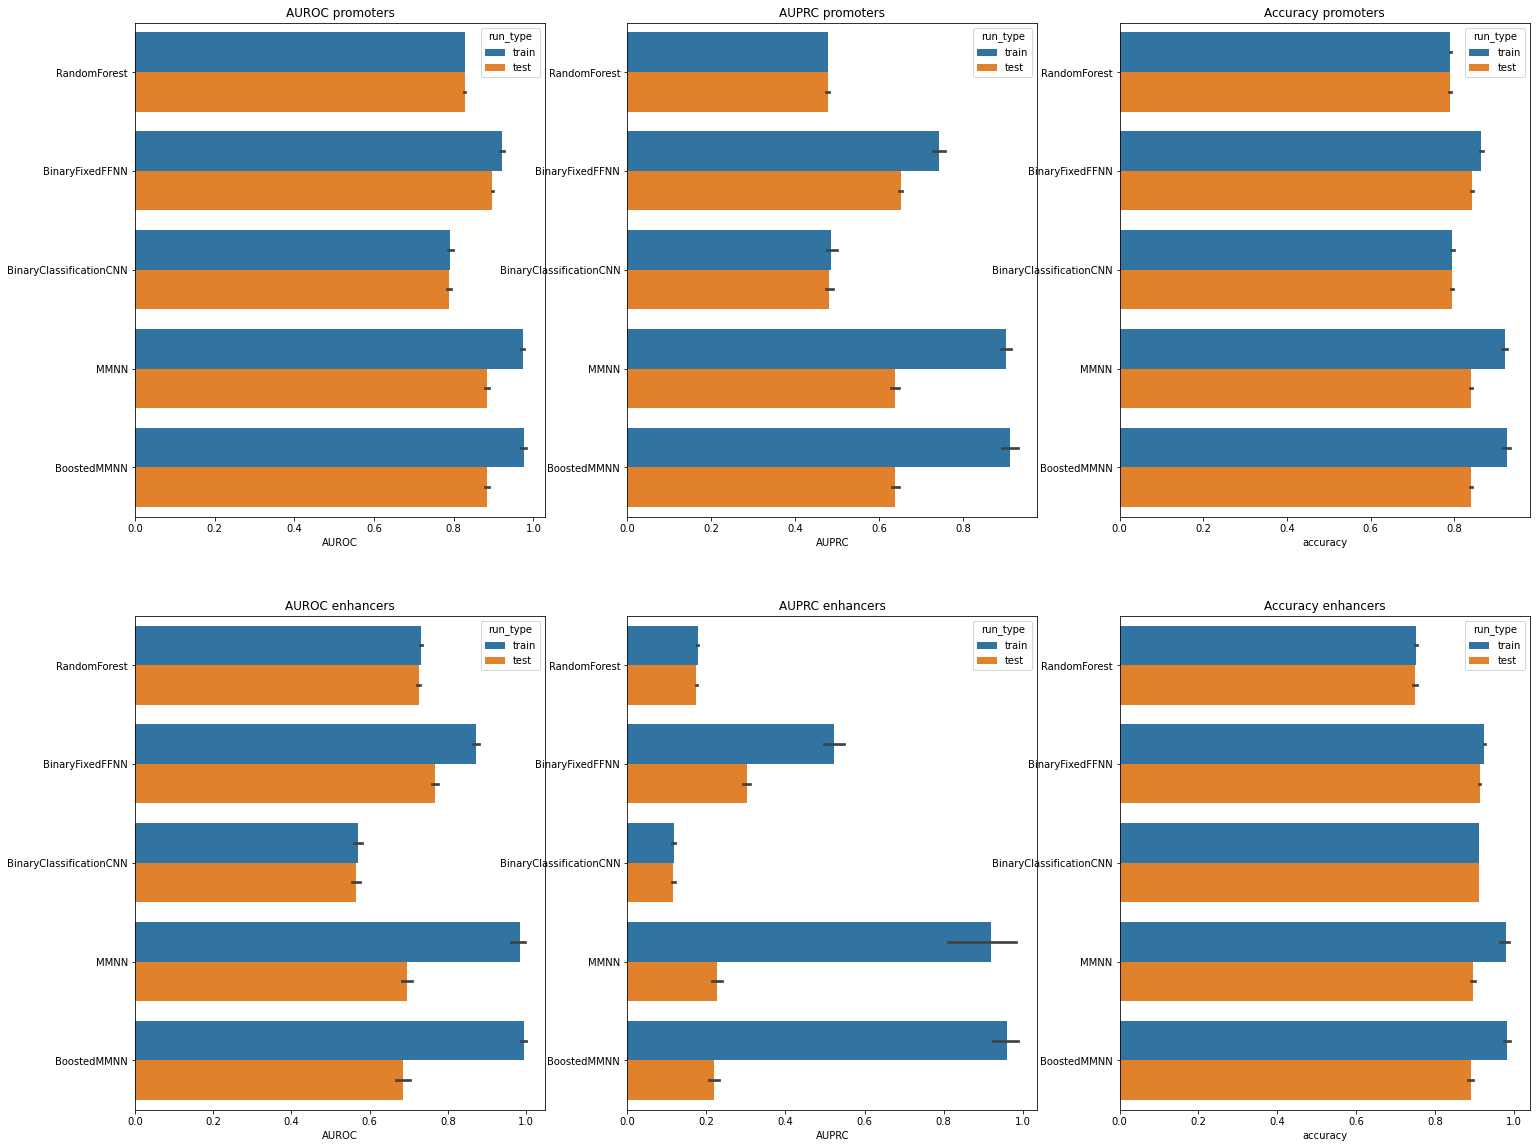

In [29]:
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 20), squeeze=True)

for i, (task_name, dataframe) in enumerate(
    all_performance_classification.items()
):
    with_fs = dataframe[(dataframe.use_feature_selection == "Yes") | 
                           (dataframe.use_feature_selection == True)]
    sbn.barplot(x="AUROC",
                y="model_name",
                data=with_fs,
                hue="run_type",
                orient="h",
                ax=axs[i][0])
    _ = axs[i][0].set_title(f"AUROC {task_name}")
    axs[i][0].set_ylabel("")
    
    sbn.barplot(x="AUPRC",
                y="model_name",
                data=with_fs,
                hue="run_type",
                orient="h",
                ax=axs[i][1])
    _ = axs[i][1].set_title(f"AUPRC {task_name}")
    axs[i][1].set_ylabel("")
    
    sbn.barplot(x="accuracy",
                y="model_name",
                data=with_fs,
                hue="run_type",
                orient="h",
                ax=axs[i][2])
    _ = axs[i][2].set_title(f"Accuracy {task_name}")
    axs[i][2].set_ylabel("")

# Wilcoxon test

In [31]:
from scipy.stats import wilcoxon

First, compare the test on the performance of the same model with and without feature selection.

In [42]:
# test if the models perform better with feature selection or not
for region, X in all_performance_classification.items():
    print()
    print("#"*30)
    print("#"*5, region.upper(), "#"*5)
    print("#"*30)
    
    for model in X.model_name.unique():
        test_performance = X[(X.model_name == model) & (X.run_type == "test")]
        performance_with_feature_selection = test_performance[
            X.use_feature_selection == "Yes"
        ]
        performance_without_feature_selection = test_performance[
            X.use_feature_selection == "No"
        ]
        print("="*10, f" comparing {model} ", "="*10)
        for metric in ("AUPRC", "AUROC", "accuracy"):
            metric_with_fs, metric_without_fs = (
                    performance_with_feature_selection[metric], 
                    performance_without_feature_selection[metric])
            try:
                _, p_value = wilcoxon(
                    performance_with_feature_selection[metric],
                    performance_without_feature_selection[metric])
                if p_value < 0.01:
                    if metric_with_fs.mean() > metric_without_fs.mean():
                        print(f"{model} shows better results for {metric} with"
                              " feature selection.")
                    else:
                        print(f"{model} shows better results for {metric}"
                              " without feature selection.")
                else:
                    print(f"{model} shows statistically indistinguishiable"
                          f" results for {metric} with and without feature"
                          " selection.")
            except ValueError:
                print(f"{model} has the same values for {metric}")


##############################
##### PROMOTERS #####
##############################
==========  comparing RandomForest  ==========
RandomForest shows statistically indistinguishiable results for AUPRC with and without feature selection.
RandomForest shows statistically indistinguishiable results for AUROC with and without feature selection.
RandomForest shows statistically indistinguishiable results for accuracy with and without feature selection.
==========  comparing BinaryFixedFFNN  ==========
BinaryFixedFFNN shows statistically indistinguishiable results for AUPRC with and without feature selection.
BinaryFixedFFNN shows statistically indistinguishiable results for AUROC with and without feature selection.
BinaryFixedFFNN shows statistically indistinguishiable results for accuracy with and without feature selection.
==========  comparing BinaryClassificationCNN  ==========
BinaryClassificationCNN shows statistically indistinguishiable results for AUPRC with and without feature sel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Then, compare the performance of one predictor over the others.

In [44]:
# comparison between models

for region, X in all_performance_classification.items():
    print("#"*30)
    print(region.upper())
    print("#"*30)
    models = X.model_name.unique()
    for i in range(len(models)):
        outer_model = models[i]
        print(f"=== comparing performance for {outer_model} ===")
        outer_model_performance = X[
            (X.model_name == outer_model) &
            (X.run_type == "test") &
            (X.use_feature_selection == "No")
        ]
        for j in range(i+1, len(models)):
            inner_model = models[j]
            inner_model_performance = X[
                (X.model_name == inner_model) &
                (X.run_type == "test") &
                (X.use_feature_selection == "No")
            ]

            for metric in ("AUPRC", "AUROC", "accuracy"):
                outer_performance, inner_performance = (
                    outer_model_performance[metric], 
                    inner_model_performance[metric])
                _, p_value = wilcoxon(outer_performance, inner_performance)
                if p_value < 0.01:
                    if outer_performance.mean() > inner_performance.mean():
                        best_model, worse_model = outer_model, inner_model
                    else:
                        best_model, worse_model = inner_model, outer_model
                    print("The model {} outperforms the model {} with p-value"
                          " {} on metric {}.".format(
                              best_model, worse_model, p_value, metric))
                else:
                    print("The model {} is statistially indistinguishiable from"
                          " {} with p-value {} on metric {}.".format(
                              outer_model, model, p_value, metric))

##############################
PROMOTERS
##############################
=== comparing performance for RandomForest ===
The model BinaryFixedFFNN outperforms the model RandomForest with p-value 0.005062032126267864 on metric AUPRC.
The model BinaryFixedFFNN outperforms the model RandomForest with p-value 0.005062032126267864 on metric AUROC.
The model BinaryFixedFFNN outperforms the model RandomForest with p-value 0.005062032126267864 on metric accuracy.
The model RandomForest is statistially indistinguishiable from BoostedMMNN with p-value 0.012515318690073973 on metric AUPRC.
The model RandomForest outperforms the model BinaryClassificationCNN with p-value 0.005062032126267864 on metric AUROC.
The model RandomForest is statistially indistinguishiable from BoostedMMNN with p-value 0.6464622026641696 on metric accuracy.
The model MMNN outperforms the model RandomForest with p-value 0.005062032126267864 on metric AUPRC.
The model MMNN outperforms the model RandomForest with p-value 0.005